# Stoneburner, Kurt #
- ## DSC 550 - Week 06
- ## Milestone #1

### Project: Ethnic Breakdown of COVID rates by California County ###
I'm interested in looking at the racial disparities of confirmed COVID-19 Cases in California. This is an extension of my DSC540 project which gathered California countywide COVID data along, Statewide racial COVID data and county wide demographics. My initial goal is to model/estimate COVID cases at the county level.

### Considerations ###
The data is a bit stale, it runs til 2/27. The State of California changed the data format since I submitted my DSC 540 project. Time permitting, I want to modify this case study to use the most current California COVID data since the effects of the Pandemic are still unfolding. However, for Milestone \#1, I'm under a strict deadline to finish this assignment by Thursday 4/22. It's my 14year wedding anniversary weekend. I would be loathe and remiss if I failed to properly honor that. Hence, this Milestone feels rushed by my standards.

### Original Data Sources###
Data gathering and preprocessing notebook is at:
https://github.com/kstoneburner/DSC/blob/master/DSC540/project/DSC540%20StoneburnerKurt%20TermProject%20_%20Load_PreProcess_Data.ipynb

Additional processing and data combining is documented here:
https://github.com/kstoneburner/DSC/blob/master/DSC540/project/DSC540%20StoneburnerKurt%20TermProject%20_MainTable_Data.ipynb

I saved the dataframes from those notebooks to use in this one. Also, I assembled my visualizations and commentary here to keep everything congruent. Data and code are detailed below.

### Questions:###

   - What are the differences in racial COVID rates across California as a whole?

   - How do individual county COVID rates vary?

   - What is the importance of measuring community prevelance (rate of infection) compared to actual COVID number?

### Graphing ###
First steps are simply to plot the confirmed COVID cases time series by county.

![title](z_mile1_01.png)

Looking at total COVID cases by county

![title](z_mile1_02.png)


These graph demonstrate the need to scale the data. The larger counties dominate the total COVID numbers simply due to having larger populations. The solution is to examine the rate of COVID infection. This is done by measuring the new COVID cases per 100,000 people. The following indicates this is a good track to follow. 

### COVID Rates per 100,000 people.

![title](z_mile1_03.png)

Aside from a few outlier counties the COVID infections rates seem to be similar. More importantly, Los Angeles does not dominate the chart. However, at this scale, counties with populations below 100,000 are not counted. I may experiment with changing the scale to cases per 10,000.

![title](z_mile1_04.png)

Looking at the total COVID cases by county, there are 13 counties that have COVID infection rates higher than the State COVID infection rate. These are deemed high COVID counties and will require additional scrutiny.

### Statewide Breakdown ###
Here is breakdown of Statewide COVID cases by ethnicity. There are clear and distinct gaps in cases by race. There may be differences in COVID infection based of race.
![title](z_mile1_05.png)

Looking at total COVID infections by race compared to the expected infections (assuming COVID was evenly distributed across all races), it is clear that Latinos bear a higher infection rate than any other racial category. Latinos are the only racial category that has more infections than expected. This indicates there is a significant racial disparity in COVID infections statewide. 
![title](z_mile1_06.png)

### High COVID county racial composition ###

Every county with the highest infection rates have large Latino populations. Imperial county which has the highest COVID prevalence in the state is nearly 85% Latino.
![title](z_mile1_07.png)

### Final Thoughts ###
There is significant COVID infection racial disparity. I want to look deeper into quantifying it. The data also runs counter to the media narrative that Black communities are hit especially hard with COVID. Considering, I am member of the media that perpetuates that narrative, I'd like to look closer at the racial disparities in the Bay Area counties. Maybe it's relative here but not representative across the state. 

I really want to look building regression models to try and quantify the disparitites at a county level. Since racial information is only aggregated at the state level this can give a more granular view of how each county handles racial disparity.


In [1]:
#//*** Consider using Waterfall Charts to plot Expected vs actual values.
#//*** This may require bar charts and binning.

In [2]:
import os
import sys
# //*** Imports and Load Data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#//*** Use the whole window in the IPYNB editor
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

#//*** Maximize columns and rows displayed by pandas
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)

#pd.set_option('display.width', 200)

In [3]:
# //*** Legends automatically generate too many labels based on my looping method.
# //*** Remove the Duplicate Legends. I wrote this for DSC 530 and it keeps on giving.
def deduplicate_legend(input_ax):
    # //**** Get handle and label list for the current legend
    # //**** Use first instance, toss the rest.
    handles, labels = input_ax.get_legend_handles_labels()

    handle_dict = {}

    for x in range(len(labels)):
        if labels[x] not in handle_dict.keys():
            # //*** Label = handle
            handle_dict[labels[x]] = handles[x]

    # //*** Build unique output ists and handles
    out_handles = []
    out_labels = []
    
    for label,handle in handle_dict.items():
        out_handles.append(handle)
        out_labels.append(label)
    
    return out_handles,out_labels

   

In [4]:
#//*** Assigns a color from a palette list to a county. 
def assign_color(input_item, input_cd,input_palette):
    #//*** Check if item already exists, if so, return input_cd
    if input_item in input_cd.keys():
        return input_cd
    
    #//*** input_item needs a Color. Walk down the input_palette till one is not found
    for color in input_palette:
        if color not in input_cd.values():
            input_cd[input_item] = color
            return input_cd
    print("UH OH ran out of colors!!!")
    print(f"Item: {input_item}")
    print(input_cd)
    return input_cd

In [5]:
#//*** Load Datasets
bt_df = pd.read_pickle("z_bt_df.zip")
bt_df = pd.read_csv("z_bt_df.csv", index_col=0)
nbt_df = pd.read_pickle("z_ca_covid_by_race.zip")
state_race_df = pd.read_pickle("z_state_ethnic_totals.zip")
pop_attrib_df = pd.read_pickle("z_pop_attrib_df.zip")

In [6]:
#//*** Color Choices: Tucking these aside for later use
#//*** Combine these with a dictionary to create color continuity across multiple visualizations.
color_palette = ["#c6eaff","#caa669","#14bae2","#f7cd89","#98a9e7","#e2ffb7","#cb9ec2","#77dcb5","#ffc5b7","#40bdba","#fff4b0","#74d0ff","#e4da8d","#7ceeff","#d0e195","#b7ab8c","#fcffdb","#83b88d","#ffe2c0","#abc37a"]
color_palette = ["#557788","#e12925","#44af0e","#7834c0","#726d00","#130c6d","#004e12","#f7007d","#017878","#950089","#00a3d7","#4b000e","#0063c2","#f07478","#013b75","#cf81b8","#212238","#af87e7","#320f49","#9c91db"]
county_color_palette = ["#b4a23b","#4457ca","#9ec535","#a651cb","#59ce59","#6a77f0","#52a325","#b93d9b","#36b25c","#e374d4","#c1c035","#7452af","#96ae3a","#a484e2","#89c466","#e54790","#57c888","#dd3d60","#5bd6c4","#dd4e2d","#45ccdf","#bd3738","#4cb998","#b13a6c","#368433","#588feb","#dcad3d","#4763af","#e49132","#4aa5d4","#c86321","#7695d3","#769233","#925898","#54701c","#c893d6","#3d7b44","#e084ac","#65a76b","#965179","#296437","#e57f5f","#31a8ad","#a44b2c","#368d71","#df7f81","#226a4d","#96465f","#b5b671","#68649c","#ad772e","#a34f52","#758348","#d8a06e","#505e25","#8e5e31","#8e8033","#695f1b"]
county_color_palette = ["#96465f","#dd3d60","#df7f81","#a34f52","#bd3738","#dd4e2d","#e57f5f","#a44b2c","#c86321","#8e5e31","#d8a06e","#e49132","#ad772e","#dcad3d","#b4a23b","#8e8033","#695f1b","#c1c035","#b5b671","#96ae3a","#505e25","#758348","#9ec535","#769233","#54701c","#52a325","#89c466","#368433","#59ce59","#3d7b44","#65a76b","#296437","#36b25c","#57c888","#226a4d","#368d71","#4cb998","#5bd6c4","#31a8ad","#45ccdf","#4aa5d4","#7695d3","#588feb","#4763af","#6a77f0","#4457ca","#68649c","#a484e2","#7452af","#a651cb","#c893d6","#925898","#e374d4","#b93d9b","#965179","#e084ac","#e54790","#b13a6c"]
county_color_palette = ["#226a4d","#31a8ad","#68649c","#758348","#505e25","#368d71","#4aa5d4","#965179","#7695d3","#45ccdf","#296437","#96465f","#8e5e31","#b5b671","#d8a06e","#a34f52","#5bd6c4","#695f1b","#4cb998","#df7f81","#3d7b44","#e084ac","#c893d6","#65a76b","#8e8033","#925898","#4763af","#54701c","#ad772e","#a44b2c","#e57f5f","#769233","#57c888","#b13a6c","#588feb","#a484e2","#b4a23b","#368433","#89c466","#7452af","#96ae3a","#dcad3d","#bd3738","#36b25c","#e374d4","#c86321","#b93d9b","#e49132","#dd3d60","#e54790","#c1c035","#4457ca","#6a77f0","#52a325","#9ec535","#dd4e2d","#a651cb","#59ce59"]

In [7]:
#//**************************
#//*** Big Table Dataframe
#//**************************
#//*** Started with the county COVID cases: Confirmed and deaths.
#//*** Each County value is merged with the Statewide covid cases by ethnicity along with the population and population makeup of the county.
#//*** The population values are static attributes. 
#//*** The fields containiner rf refer to populations of modeled COVID risk factors by county. These numbers were provided by the census bureau at the census tract level.
#//*** the 0rf attributes reference population with 0 risk factors
#//** the 1-2rf attributes reference the population with 1-2 COVID Risk Factors
#//** the 3plrf attributes reference the population with 3 or more COVID risk factors.
#//** It was a really cool study, I just haven't found a use for it yet.
#//***********************************************************************
bt_df['date'] = pd.to_datetime(bt_df['date'])
print(bt_df)

          race  cases  case_percent  deaths  death_percent  percent_ca_pop  \
0       Latino   5276         35.99     170          28.38            38.9   
1       Latino   5276         35.99     170          28.38            38.9   
2       Latino   5276         35.99     170          28.38            38.9   
3       Latino   5276         35.99     170          28.38            38.9   
4       Latino   5276         35.99     170          28.38            38.9   
...        ...    ...           ...     ...            ...             ...   
132568  Native   8861          0.30     173           0.30             0.5   
132569  Native   8861          0.30     173           0.30             0.5   
132570  Native   8861          0.30     173           0.30             0.5   
132571  Native   8861          0.30     173           0.30             0.5   
132572  Native   8861          0.30     173           0.30             0.5   

             date      county  cty_confirmed  cty_deaths  cty_n

In [8]:
#//******************************
#//*** New Big Table 
#//******************************
#//*** Takes the COVID values and breaks them down to cases per 100k. I treated the population per 100k value as an integer.
#//*** I'll rework this to be a float. I feel the int values are a bit representative. 
print(nbt_df)

              date    race   cases  deaths         county  cty_newconfirm  \
0       2020-04-13  Latino    5276     170         Solano               1   
1       2020-04-13  Latino    5276     170         Sonoma               2   
2       2020-04-13  Latino    5276     170   Contra Costa              28   
6       2020-04-13  Latino    5276     170  San Francisco              73   
9       2020-04-13  Latino    5276     170      San Mateo              15   
...            ...     ...     ...     ...            ...             ...   
130221  2021-02-27   Black  109591    3161     Sacramento             101   
130225  2021-02-27   Black  109591    3161   Contra Costa             134   
130237  2021-02-27   Black  109591    3161    Los Angeles            1144   
130241  2021-02-27   Black  109591    3161      San Diego             450   
130254  2021-02-27   Black  109591    3161        Alameda             178   

        cty_newdeath  state_confirmed       pop  pop_race  pop_100k  \
0   

In [9]:
#//*** State Race Dataframe, time series of State Wide COVID cases by race per 100,000.
print(state_race_df)

           date  all_races     Latino  Multiracial     Black     Asian  \
0    2020-04-13   0.000000   0.000000     0.000000  0.000000  0.000000   
1    2020-04-14   2.506329   1.605063     0.088608  0.194937  0.362025   
2    2020-04-15   2.749367   1.324051     0.065823  0.174684  0.293671   
3    2020-04-16   4.450633   1.468354     0.083544  0.172152  0.506329   
4    2020-04-17   3.407595   1.554430     0.035443  0.172152  0.324051   
..          ...        ...        ...          ...       ...       ...   
316  2021-02-23   8.726582   7.683544     0.318987  0.696203  1.313924   
317  2021-02-24  13.425316  11.653165     0.825316  0.658228  1.445570   
318  2021-02-25  12.569620   5.997468     0.863291  0.825316  1.377215   
319  2021-02-26  13.670886  12.764557     0.179747  0.726582  1.331646   
320  2021-02-27  13.040506   8.027848     0.521519  0.605063  1.027848   

        White  
0    0.000000  
1    0.759494  
2    0.759494  
3    0.670886  
4    0.640506  
..        ...  

In [10]:
#//*** Population Attributes. County population along with Racial population counts
print(pop_attrib_df)

       cty_fibs           county  population   Latino    White    Asian  \
index                                                                     
0             1          Alameda     1671329   373055   512134   529698   
1             3           Alpine        1129      139      692       18   
2             5           Amador       39752     5753    30742      575   
3             7            Butte      219186    37731   155415    10573   
4             9        Calaveras       45905     5967    36672      719   
5            11           Colusa       21547    13018     7344      266   
6            13     Contra Costa     1153526   300420   492393   204045   
7            15        Del Norte       27812     5596    17236      802   
8            17        El Dorado      192843    25378   148903     8974   
9            19           Fresno      999101   537180   286049   103430   
10           21            Glenn       28393    12079    14334      752   
11           23         H

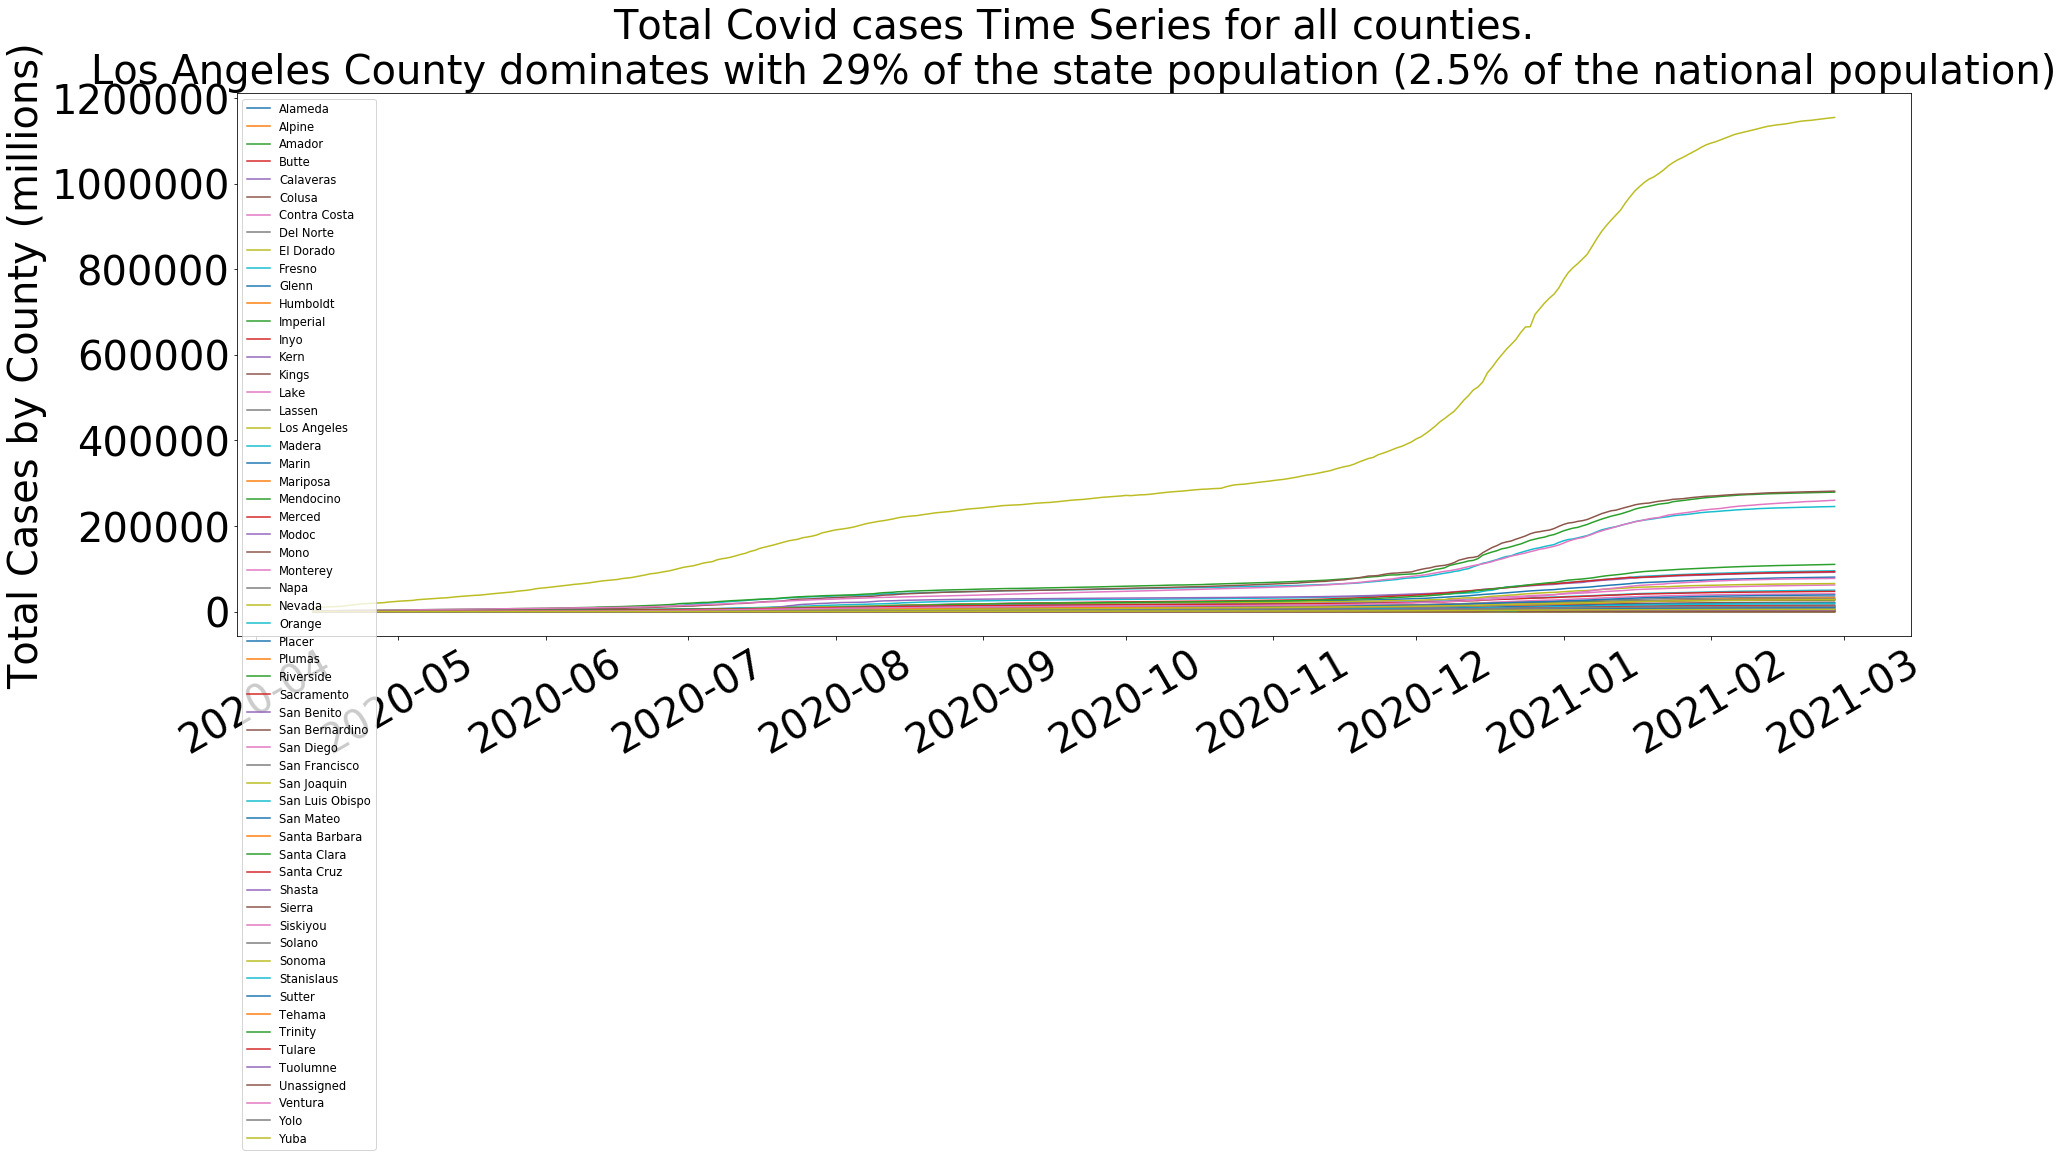

In [11]:
##########################################################################################
#//*** Quick illustration of why compareing counties in California is difficult
##########################################################################################
import matplotlib.dates as mdates

plt.rcParams['figure.figsize'] = [30,10]
plt.rcParams.update({'figure.max_open_warning': 0})

display_size = 40
fig,ax = plt.subplots()
for group in bt_df[ bt_df["race"] == "Latino"] .groupby("county"):
    loop_df = group[1]
    
    #print(loop_df["county"].iloc[0],loop_df['cases'])
   
    ax.plot(loop_df['date'],loop_df['cty_confirmed'], label=loop_df["county"].iloc[0])


plt.xticks(rotation=30,fontsize=display_size)
plt.yticks(fontsize=display_size)
handles,labels = deduplicate_legend(ax)
plt.legend(fontsize=display_size*.288,loc='upper left')
plt.title(f"Total Covid cases Time Series for all counties.\nLos Angeles County dominates with 29% of the state population (2.5% of the national population)",fontsize=display_size)
plt.ylabel("Total Cases by County (millions)",fontsize=display_size)
plt.show()


    
    
    

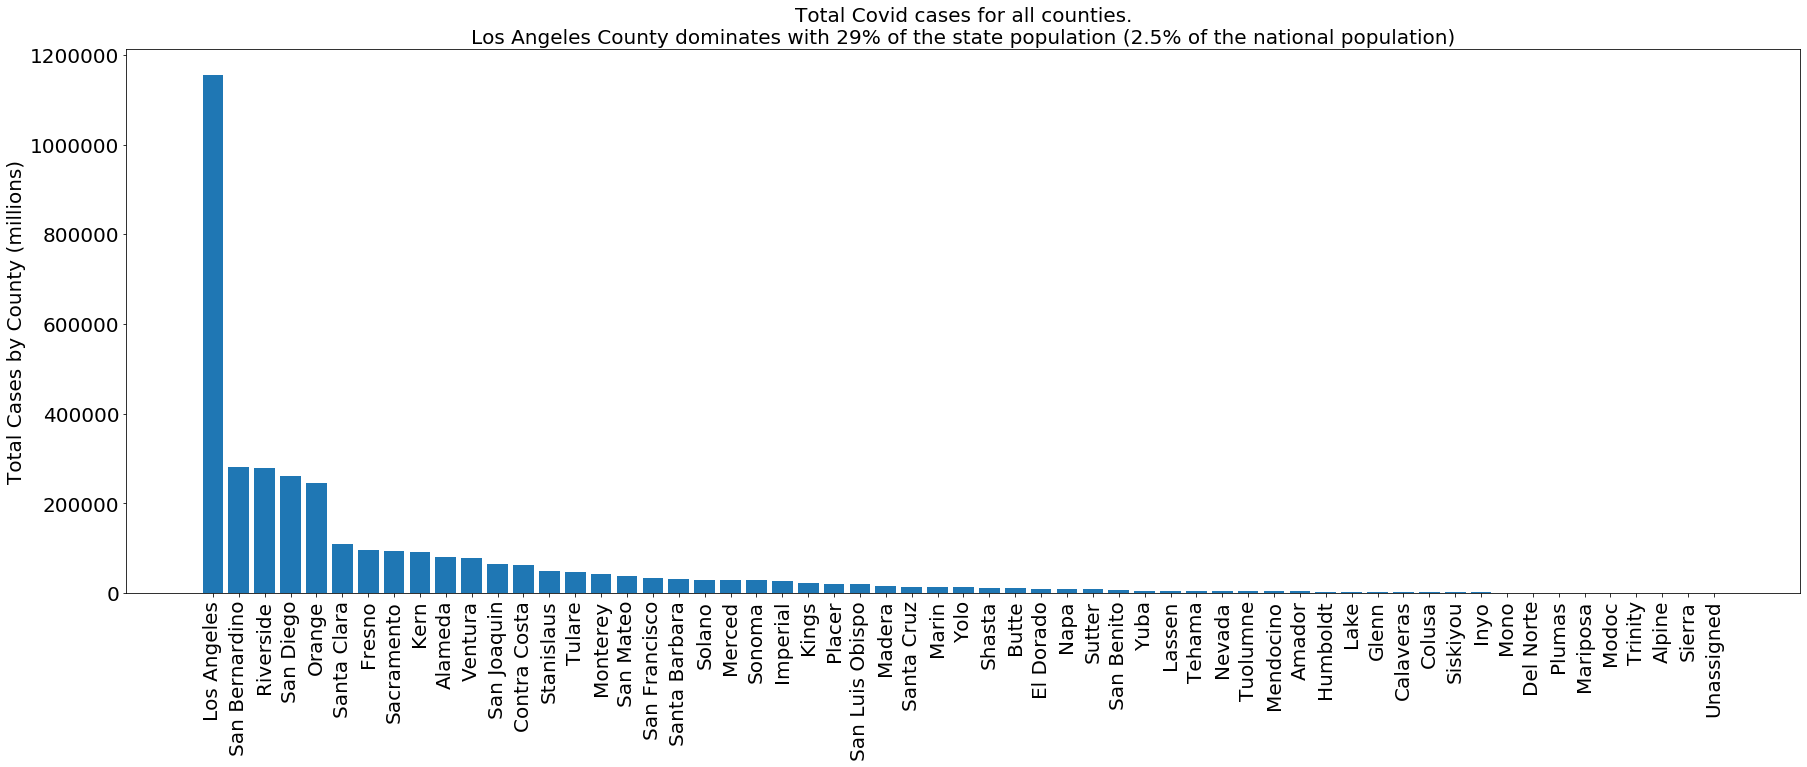

In [12]:
#//*** Snapshot the last day with raw numbers
#//*** Compare raw county values on the last day of the data set

#//*** Get the last data
last_date = (bt_df['date'].unique())[-1]

#//*** Looking at total numbers, grab all values with a single race
last_day_df = bt_df[  bt_df['race'] == "Latino"]

#//*** Filter by last date in the dataframe, sort by the total confirmed cases
last_day_df =  last_day_df[last_day_df['date'] == last_date ].sort_values("cty_confirmed",ascending=False)

display_size = 20
fig,ax = plt.subplots()

ax.bar(last_day_df['county'],last_day_df['cty_confirmed'])


        
plt.xticks(rotation=90,fontsize=display_size)
plt.yticks(fontsize=display_size)

plt.title(f"Total Covid cases for all counties.\nLos Angeles County dominates with 29% of the state population (2.5% of the national population)",fontsize=display_size)
plt.ylabel("Total Cases by County (millions)",fontsize=display_size)
plt.show()



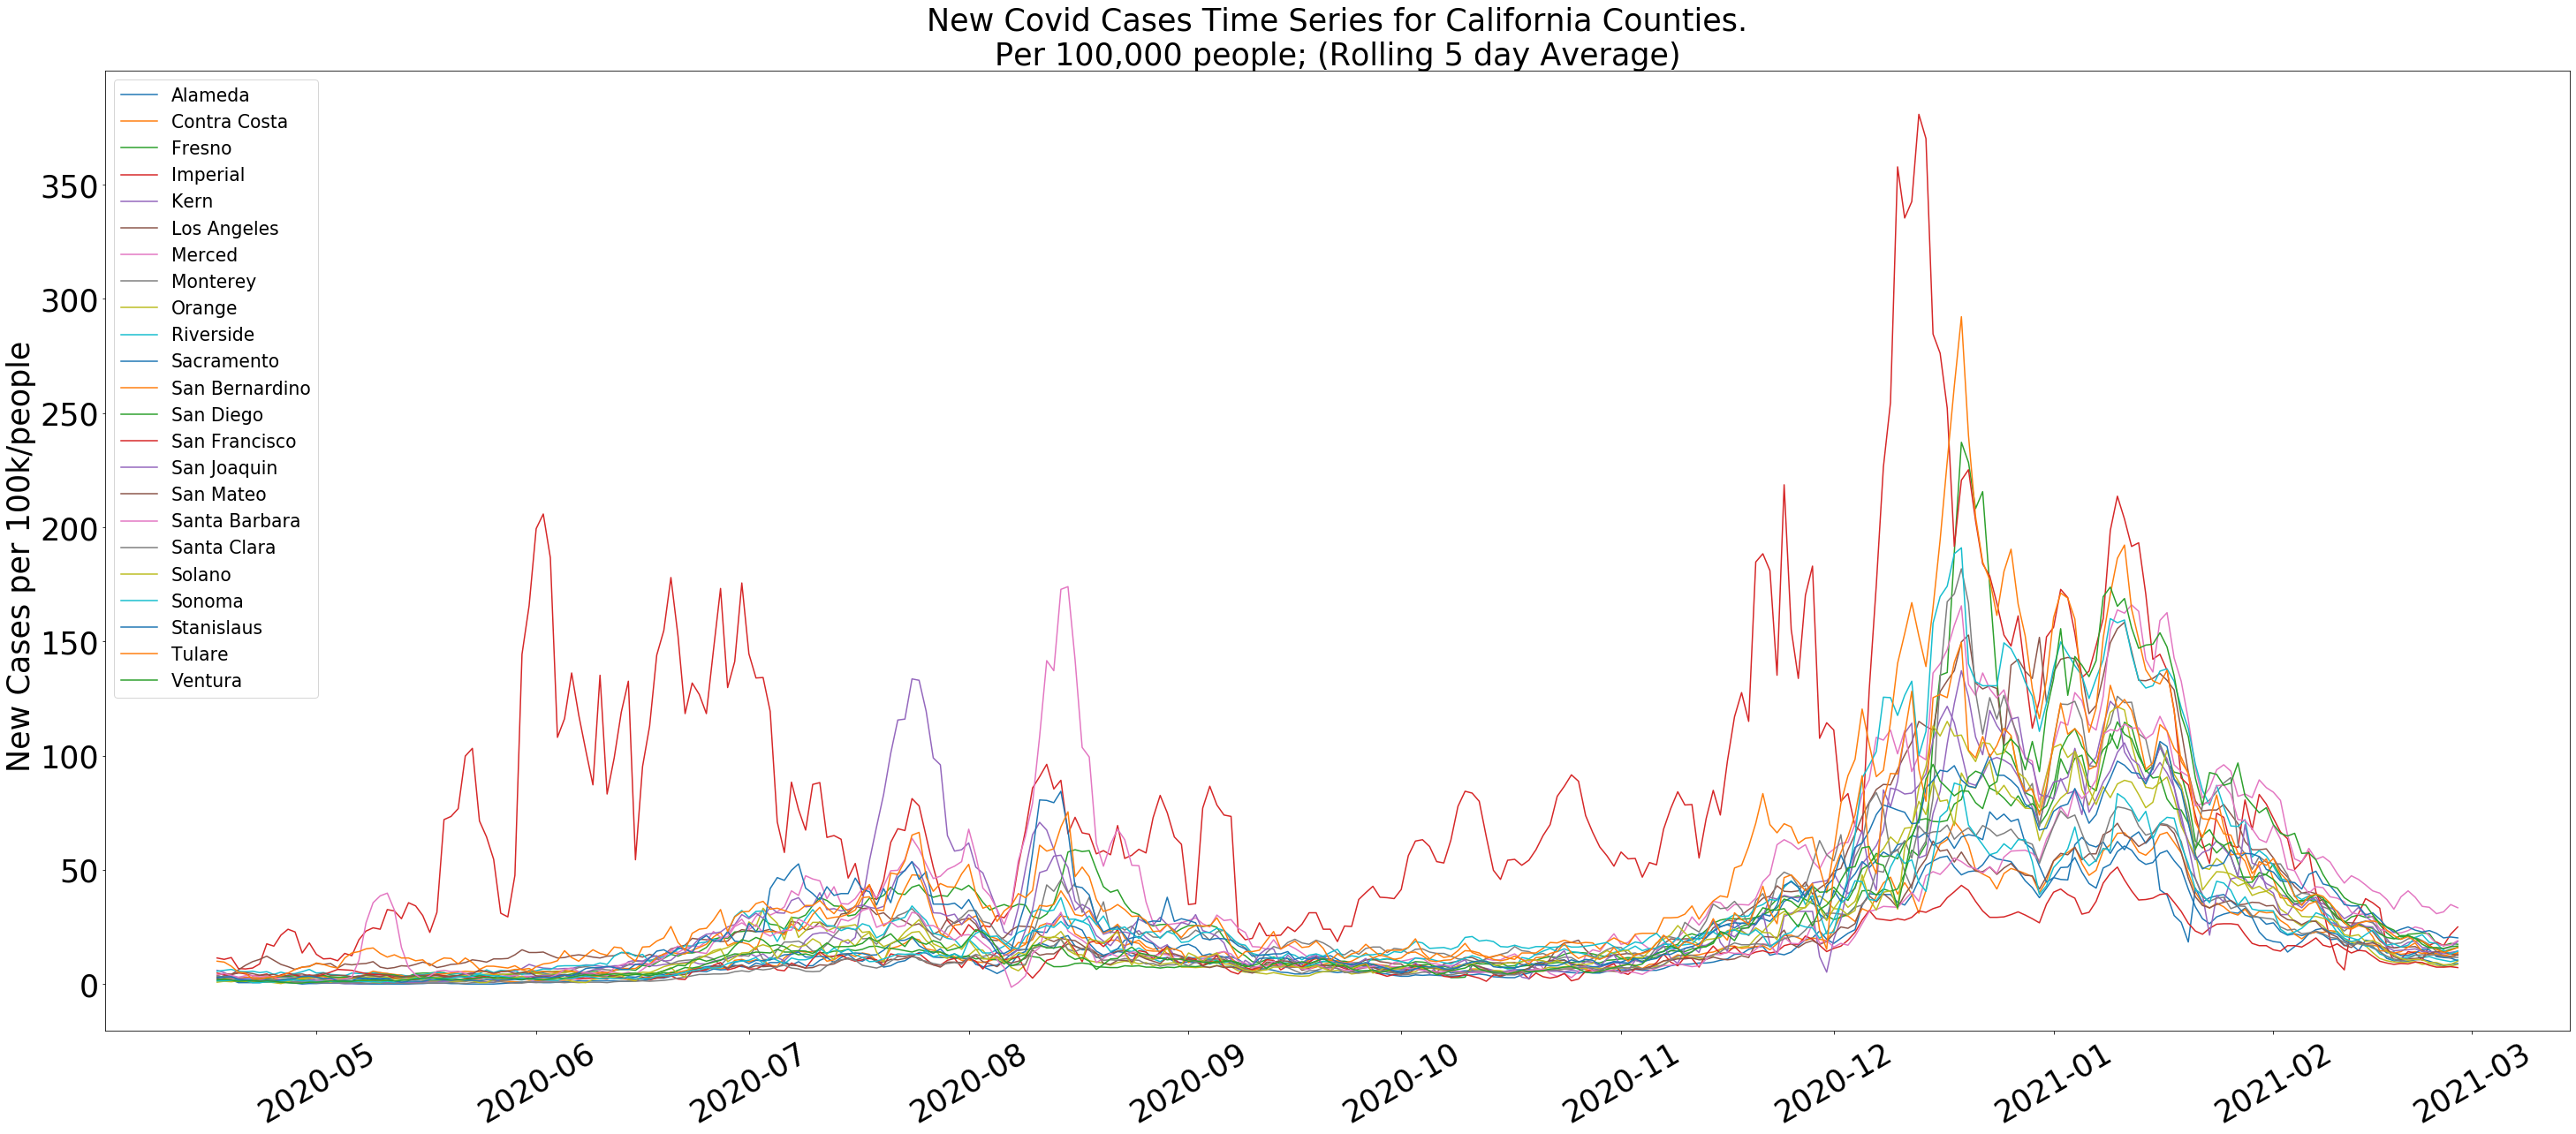

In [13]:

################################################################################################
#//*** Display a Time Series but scaled in cases per 100k
#//*** Rates per 100k scales conveys the relative prevalence of infection within the community
#//*** Some counties have a much higher COVID rate than others.
#//*** Note: This chart is NOT dominated by Los Angeles
################################################################################################

plt.rcParams['figure.figsize'] = [50,20]
plt.rcParams.update({'figure.max_open_warning': 0})

#//*** New Big Table contains cases per 100k
temp_df = nbt_df[ nbt_df["race"] == "Latino" ]

display_size = 35
fig,ax = plt.subplots()
#//*** Loop through each county and display the confirmed cases per 100k.
for group in temp_df.groupby("county"):
    loop_df = group[1]
    
    ax.plot(loop_df['date'],loop_df['confirm_cty_100k'].rolling(5).mean(), label=loop_df["county"].iloc[0])
        
plt.xticks(rotation=30,fontsize=display_size)
plt.yticks(fontsize=display_size)

handles,labels = deduplicate_legend(ax)
plt.legend(fontsize=display_size*.58,loc='upper left')
plt.title(f"New Covid Cases Time Series for California Counties.\nPer 100,000 people; (Rolling 5 day Average)",fontsize=display_size)
plt.ylabel("New Cases per 100k/people ",fontsize=display_size)
plt.show()
    
    
    

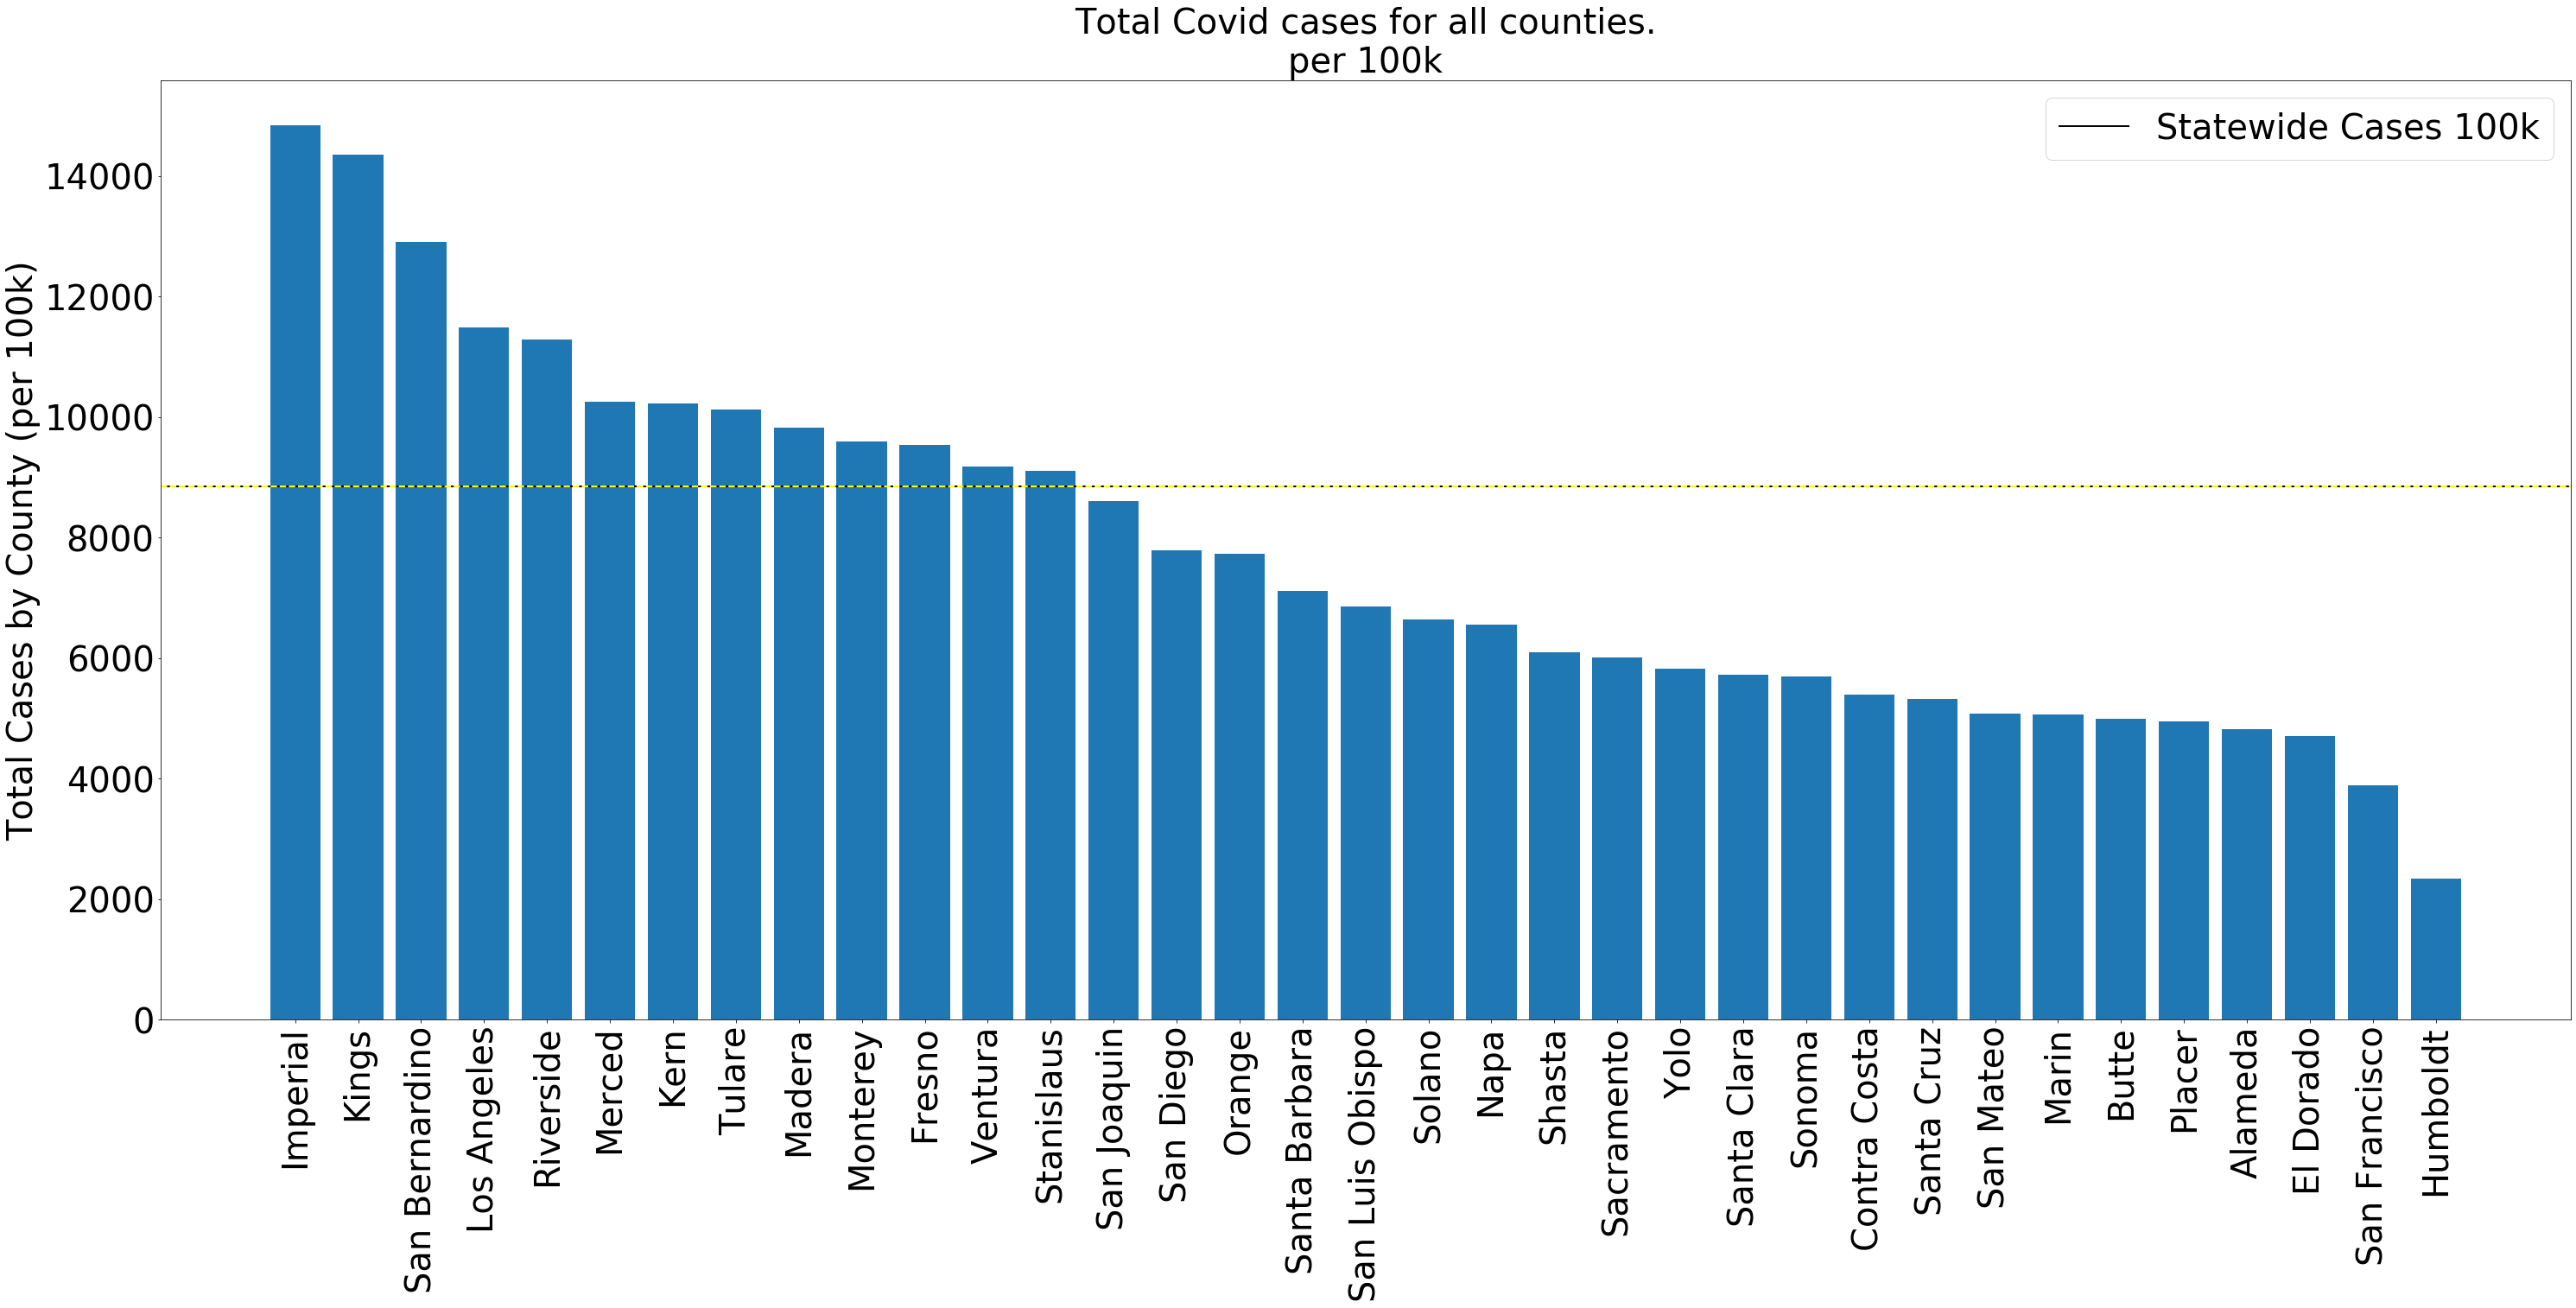

In [14]:
#//*** Look at total County COVID numbers by county rates per 100k.


#//*** Get the last data
last_date = (bt_df['date'].unique())[-1]


#//*** get Last Day from the Big Table
last_day_df = bt_df[  bt_df['race'] == "Latino" ]

#//*** Get counties with greater than 100k population
last_day_df = last_day_df[ last_day_df['pop'] > 100000]


#last_day_df['pop_100k']

#//*** Get just the lat day
last_day_df = last_day_df[last_day_df['date'] == last_date ]

last_day_df['100k_cases'] = last_day_df['cty_confirmed']/(last_day_df['pop'] / 100000)

#//*** Calculate the State per 100k rate for Comparison
state_100k = last_day_df['cty_confirmed'].sum()/(last_day_df['pop'].sum()/100000 )

last_day_df = last_day_df.sort_values('100k_cases',ascending=False)

display_size = 40
fig,ax = plt.subplots()

ax.bar(last_day_df['county'],last_day_df['100k_cases'])

#//*** Draw horizontal line. Draw it twice to get the yellow and back effect. 
#//*** This technique looks viusually good, but I can't get the legend to draw approrpriately.
ax.axhline(state_100k,color = "black", label="Statewide Cases 100k", linestyle = "-", lw=2)
ax.axhline(state_100k,color = "yellow", linestyle = "--", lw=2)
        
plt.xticks(rotation=90,fontsize=display_size)
plt.yticks(fontsize=display_size)

#handles,labels = deduplicate_legend(ax)
plt.legend(fontsize=display_size,loc='upper right')
plt.title(f"Total Covid cases for all counties.\nper 100k",fontsize=display_size)
plt.ylabel("Total Cases by County (per 100k)",fontsize=display_size)
plt.show()

#last_day_df = rd[race_list[0]][rd[race_list[0]]['date'] == last_date]

In [15]:
#//*** Get a list of counties above the State Rate per 100k
high_covid_counties = list(last_day_df[last_day_df['100k_cases'] > state_100k]['county'])

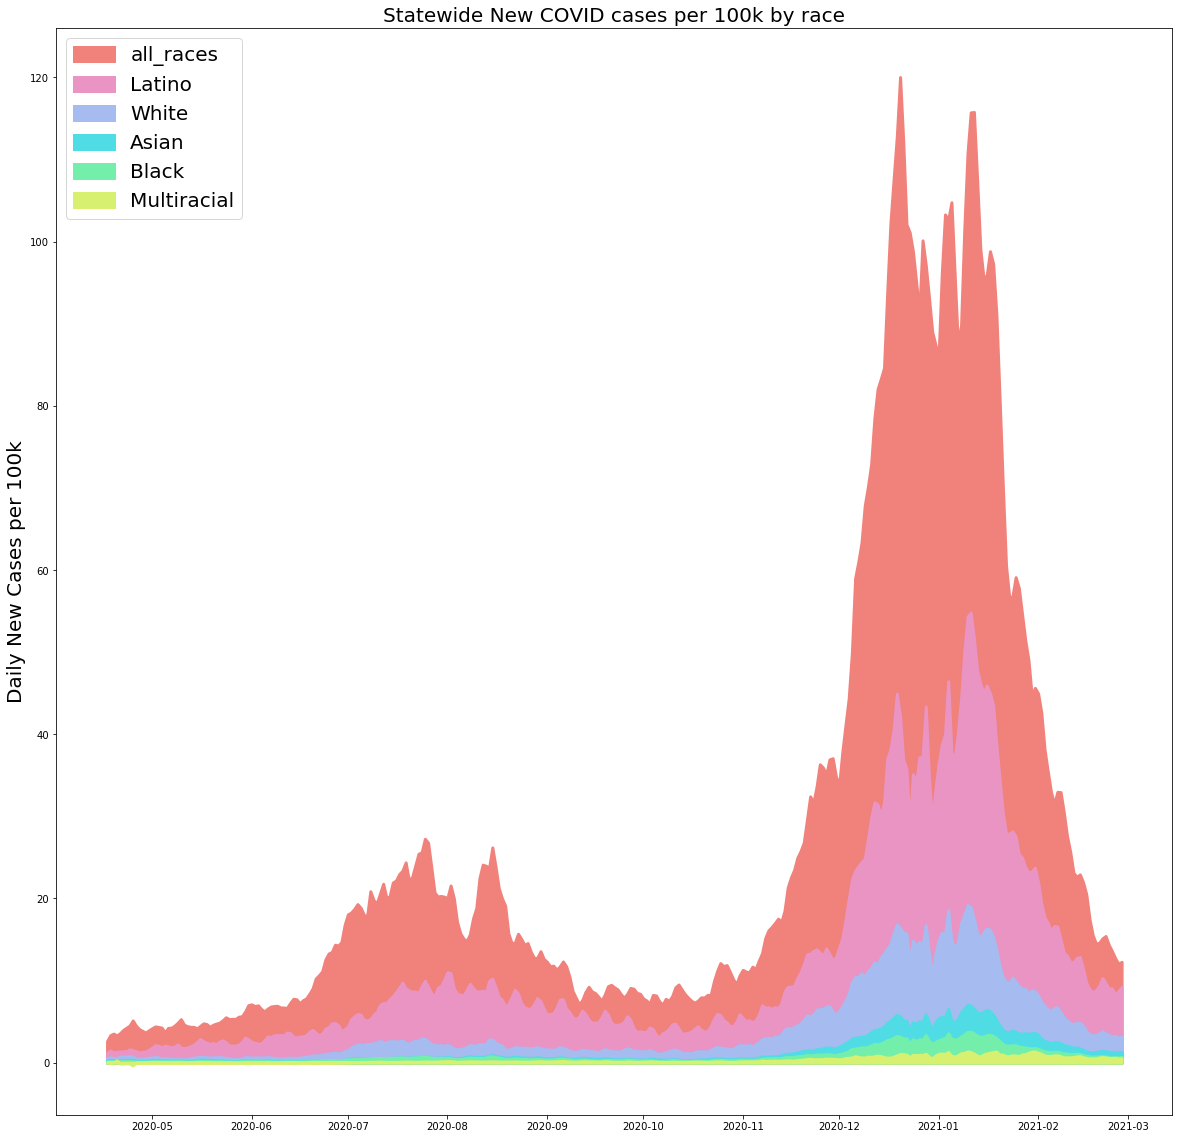

In [16]:
#//*** Plot Statewide New Case totals per 100k population
#//*** per 100k, gets everything on the same scale.
race_palette = ["#8651b8","#a84f72","#6b7744","#cb6d41","#73a6c0","#99ce65"]
race_palette = ["#F0817B","#E994C2","#A6BBF0","#4FDCE5","#74EEAB","#D8F06F","#8651b8","#a84f72","#6b7744","#cb6d41","#73a6c0","#99ce65"]


#//***Race Color Dict. Dictionary Key = County, Value = Color. Keeps the same colors for race across all graphs
rcd = {}
print()
scale_size = 20
plt.rcParams['figure.figsize'] = [scale_size, scale_size] 
plt.rcParams.update({'figure.max_open_warning': 0})

fig,ax = plt.subplots()
#//*** Generate the expected values per race. Which is the Total number * race population percentage

for col in state_race_df.sum().sort_values(ascending=False).index:
    #//*** Assign county color, so it is consistent across the graphs
    rcd = assign_color(col,rcd,race_palette)

    ax.fill_between(state_race_df['date'],state_race_df[col].rolling(5).mean(),color=rcd[col], label=col, linewidth=3)
    
plt.title("Statewide New COVID cases per 100k by race",fontsize=scale_size)
plt.legend(fontsize=scale_size,loc='upper left')
plt.ylabel('Daily New Cases per 100k',fontsize=scale_size)

plt.show()
    

In [17]:
#//*** Assign Colors for Later graphs
rcd = assign_color("Hawaiian",rcd,race_palette)
rcd = assign_color("Native",rcd,race_palette)

In [18]:
#//*** Generate racial percentages for the State. This information is generated by adding the respective racial populations in 
#//*** each county from  pop_attrib_df.

pop_attrib_df = pop_attrib_df.rename(columns={"American Indian or Alaska Native" : "Native"})

races = ["Latino","White","Asian","Black","Multiracial","Hawaiian","Native"]

#//**** California Total Population
ca_pop = pop_attrib_df['population'].sum()

#//*** Total Confirmed Cases Statewide
ca_covid_confirm = last_day_df['cty_confirmed'].sum()
print(ca_pop)
print(ca_covid_confirm)

race_pop = {}
race_percent = {}

#//*** Build Dictionaries of Race populations and percentage of race population.
for race in races:
    race_pop[race] = pop_attrib_df[race].sum()
    race_percent[race] = pop_attrib_df[race].sum()/ca_pop
print(race_pop)
print(race_percent)

#//*** Get the Statewaide cases by race
race_cases = {}

for group in bt_df[ bt_df['date'] == bt_df['date'].unique()[-1] ].groupby('race'):
    race_cases[group[0]] = group[1].iloc[0]['cases']


print(race_cases)

for race in races:
    print(race,race_percent[race],ca_covid_confirm,int(race_percent[race]*ca_covid_confirm),race_cases[race],race_cases[race]/ca_covid_confirm)
    

39512223
3415179.0
{'Latino': 15574880, 'White': 14423748, 'Asian': 5869038, 'Black': 2221363, 'Multiracial': 1114409, 'Hawaiian': 146449, 'Native': 162336}
{'Latino': 0.3941787836133644, 'White': 0.36504521651439353, 'Asian': 0.1485372766801807, 'Black': 0.05621964119811735, 'Multiracial': 0.028204158495461013, 'Hawaiian': 0.0037064226935548525, 'Native': 0.004108500804928136}
{'Asian': 183711, 'Black': 109591, 'Hawaiian': 15175, 'Latino': 1487225, 'Multiracial': 41370, 'Native': 8861, 'White': 539466}
Latino 0.3941787836133644 3415179.0 1346191 1487225 0.43547497803189816
White 0.36504521651439353 3415179.0 1246694 539466 0.1579612664519195
Asian 0.1485372766801807 3415179.0 507281 183711 0.05379249521035354
Black 0.05621964119811735 3415179.0 192000 109591 0.03208938682276976
Multiracial 0.028204158495461013 3415179.0 96322 41370 0.012113567107317069
Hawaiian 0.0037064226935548525 3415179.0 12658 15175 0.004443398135207555
Native 0.004108500804928136 3415179.0 14031 8861 0.002594593

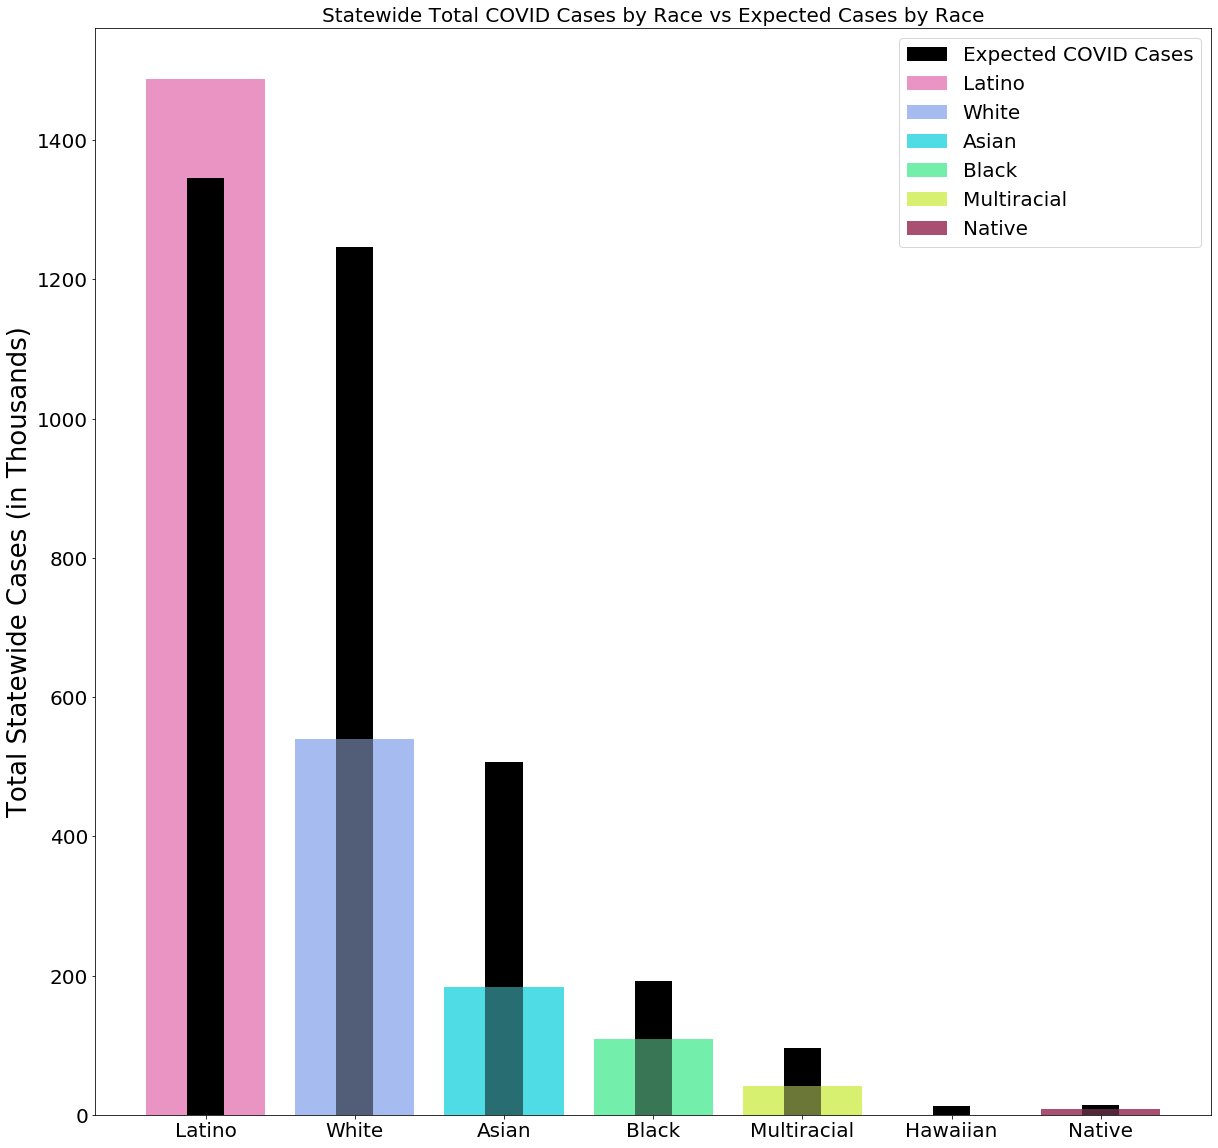

In [19]:
#//*** Show the Actual Racial COVID Cases and draw the expected COVID values assuming infection was spread evenly across the the state
#//*** population.

display_size = 20
fig,ax = plt.subplots()

#index = np.arange(len(races))

#//*** Draw a Bar graph for each Race.
for race in races:
    
    #//*** The expected values is the racial percenatge times the total California COVID Cases. 
    #//*** The actual value is the actual value for comparison
    #//*** Values are scaled in thousands.
    loop_expected = race_percent[race]*ca_covid_confirm/1000
    loop_actual = race_cases[race]/1000

    #//*** The order of the graphic varies depending on whoch value is larger.
    if loop_expected > loop_actual:
        ax.bar(race,loop_expected,color="black",width=.25)
        ax.bar(race,loop_actual, color=rcd[race],label = race)
        ax.bar(race,loop_expected,color="black",width=.25, alpha=.5)
    else:
        if race == "Latino":
            #//*** inly draw labels for the first pass. Inelegant but functional
            ax.bar(race,loop_expected,color="black",width=.25,label = "Expected COVID Cases")    
            ax.bar(race,loop_actual, color=rcd[race], label = race)
            ax.bar(race,loop_expected,color="black",width=.25)    
        else:
            ax.bar(race,loop_expected,color="black",width=.25)
        
plt.xticks(fontsize=display_size)
plt.yticks(fontsize=display_size)

handles,labels = deduplicate_legend(ax)
plt.legend(fontsize=display_size*1,loc='upper right')
plt.title(f"Statewide Total COVID Cases by Race vs Expected Cases by Race",fontsize=display_size)
plt.ylabel("Total Statewide Cases (in Thousands)",fontsize=display_size*1.3)
plt.show()

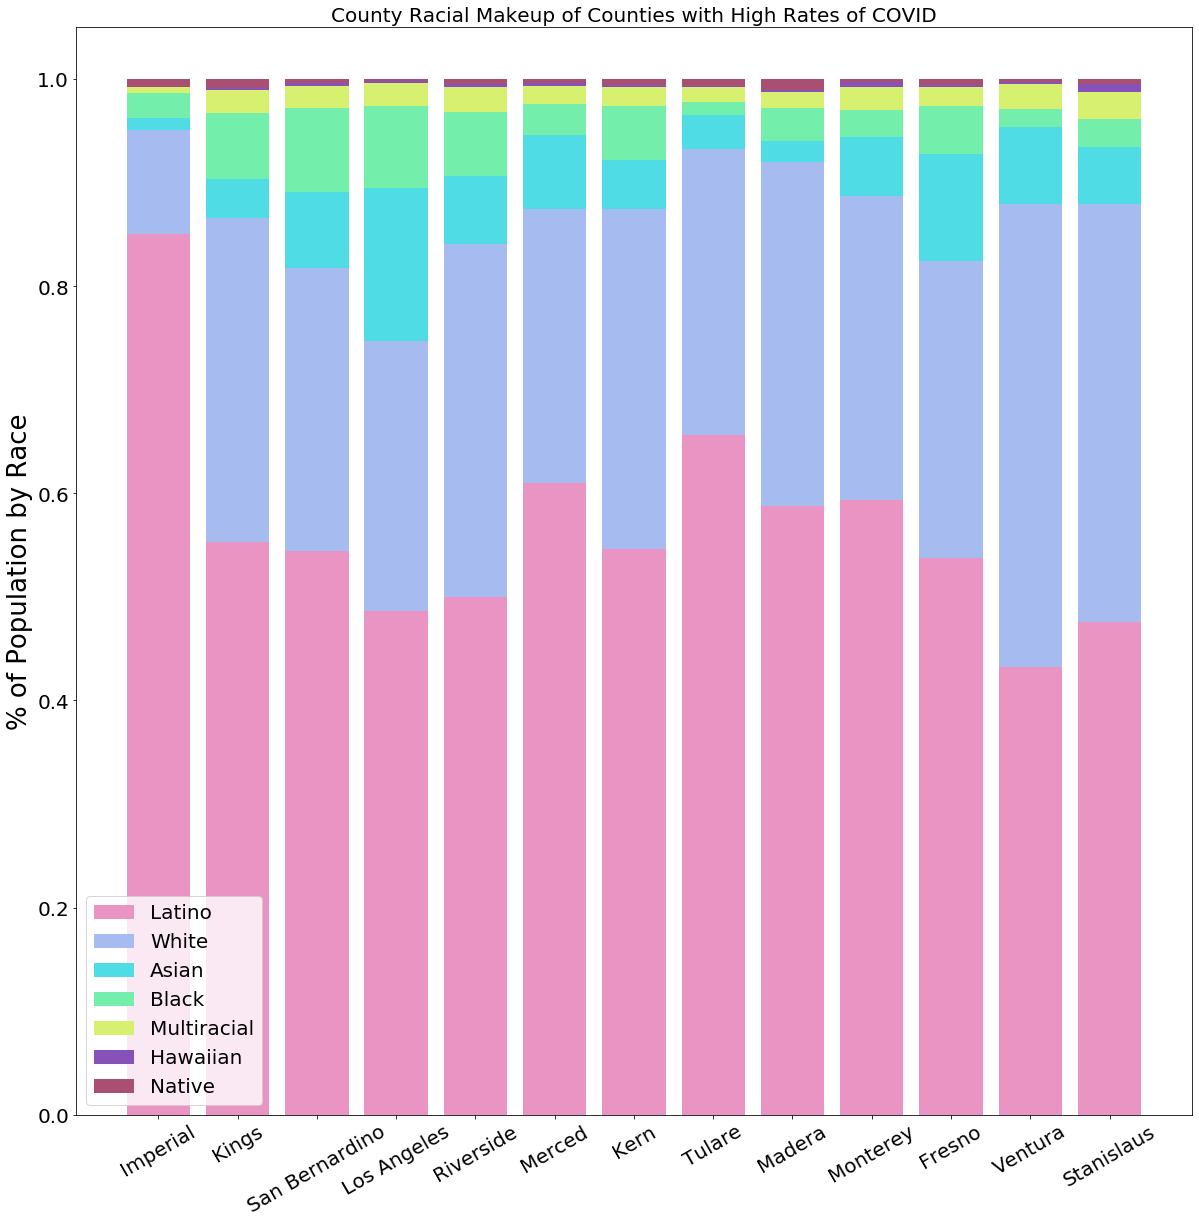

In [20]:
#//*** Generate a stacked bar chart demonstrating the racial composition for High COVID infection rate counties.
#

display_size = 20
fig,ax = plt.subplots()

#//*** Display_first used to draw labels only on the first pass.
display_first = True

#//*** Loop through high incidence counties.
for county in high_covid_counties:
    #//*** Get a dataframe of just the county
    loop_county_df = pop_attrib_df[ pop_attrib_df['county'] == county ]
    
    #//*** Sourt the county by population
    loop_county_df = loop_county_df.sort_values('population')
    
    
    bottom=0
    
    #//*** Generate county percentages of population for each race category.
    #//*** This really should be a sdub loop, but I couldn't quite make it work, so I  went manual;.
    latino = loop_county_df["Latino"]/loop_county_df['population']
    white = loop_county_df["White"]/loop_county_df['population']
    asian = loop_county_df["Asian"]/loop_county_df['population']
    black = loop_county_df["Black"]/loop_county_df['population']
    multi = loop_county_df["Multiracial"]/loop_county_df['population']
    hawaiian = loop_county_df["Hawaiian"]/loop_county_df['population']
    native = loop_county_df["Native"]/loop_county_df['population']
    
    
    #//*** Each value is drawn separately to get the bottom values to align correctly for the stacked bar chart.
    #//*** This would be much more elegant with a loop but I just couldn't get it sorted on my timetable.
    if display_first:
        display_first = False
        ax.bar(county,latino,color=rcd["Latino"],label="Latino")
        ax.bar(county,white,bottom=latino,color=rcd["White"],label="White")
        ax.bar(county,asian,bottom=latino+white,color=rcd["Asian"],label="Asian")
        ax.bar(county,black,bottom=latino+white+asian,color=rcd["Black"],label="Black")
        ax.bar(county,multi,bottom=latino+white+asian+black,color=rcd["Multiracial"],label="Multiracial")
        ax.bar(county,hawaiian,bottom=latino+white+asian+black+multi,color=rcd["Hawaiian"],label="Hawaiian")
        ax.bar(county,native,bottom=latino+white+asian+black+multi+hawaiian,color=rcd["Native"],label="Native")
    else:
        ax.bar(county,latino,color=rcd["Latino"])
        ax.bar(county,white,bottom=latino,color=rcd["White"])
        ax.bar(county,asian,bottom=latino+white,color=rcd["Asian"])
        ax.bar(county,black,bottom=latino+white+asian,color=rcd["Black"])
        ax.bar(county,multi,bottom=latino+white+asian+black,color=rcd["Multiracial"])
        ax.bar(county,hawaiian,bottom=latino+white+asian+black+multi,color=rcd["Hawaiian"])
        ax.bar(county,native,bottom=latino+white+asian+black+multi+hawaiian,color=rcd["Native"])
        

plt.xticks(rotation=30,fontsize=display_size)
plt.yticks(fontsize=display_size)

#handles,labels = deduplicate_legend(ax)
plt.legend(loc='best',fontsize=display_size*1,facecolor='white',fancybox=True, frameon=True)
plt.title(f"County Racial Makeup of Counties with High Rates of COVID",fontsize=display_size)
plt.ylabel("% of Population by Race",fontsize=display_size*1.3)
plt.show()

print()